# Remote data access using pandas

The pandas library enables access to data displayed on websites using the `read_html()` function and access to the API endpoints of various data providers through the related `pandas-datareader` library.

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
!pip install mplfinance



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

## Download html table with SP500 constituents

The download of the content of one or more html tables works as follows, for instance for the constituents of the S&P500 index from Wikipedia

In [14]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]

In [15]:
sp500_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [18]:
sp500_constituents.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


## pandas-datareader for Market Data

`pandas` used to facilitate access to data providers' APIs directly, but this functionality has moved to the related pandas-datareader library. The stability of the APIs varies with provider policies, and as of June 2o18 at version 0.7, the following sources are available

See [documentation](https://pandas-datareader.readthedocs.io/en/latest/); functionality frequently changes as underlying provider APIs evolve.

### Yahoo Finance

In [26]:
!pip install yfinance



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import yfinance as yf
import pandas as pd
from datetime import datetime

start = '2014-01-01'
end = '2017-05-24'

# Use yfinance to download data for Meta (formerly Facebook)
yahoo = yf.download('META', start=start, end=end)

# Show DataFrame
print(yahoo.head())



[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           META       META       META       META      META
Date                                                            
2014-01-02  54.411495  54.918715  53.894332  54.530843  43195500
2014-01-03  54.262314  55.346367  54.232475  54.719803  38246200
2014-01-06  56.887909  56.947579  53.755094  54.123074  68852600
2014-01-07  57.603977  58.230541  56.907800  57.385180  77207400
2014-01-08  57.912289  58.091307  56.917745  57.285725  56682400


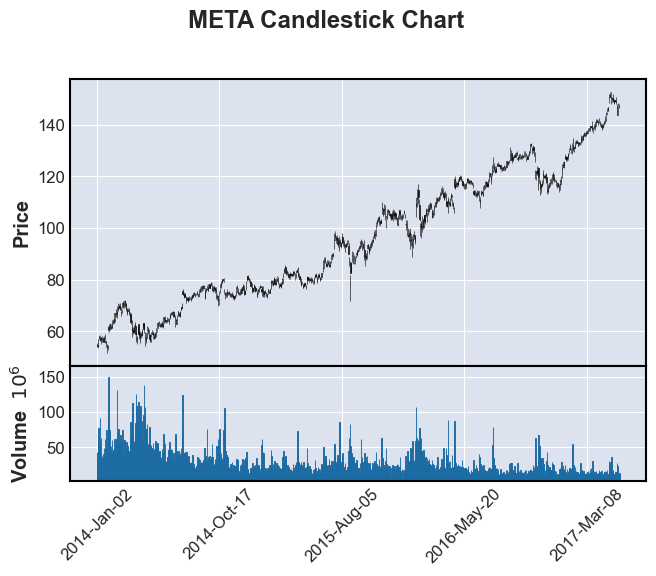

In [34]:
import mplfinance as mpf

# Step 1: Flatten the column MultiIndex
yahoo.columns = yahoo.columns.get_level_values(0)

# Step 2: Make sure index is a datetime type (required by mplfinance)
yahoo.index.name = 'Date'

# Step 3: Plot candlestick chart
mpf.plot(yahoo, type='candle', volume=True, title='META Candlestick Chart')


In [38]:
import yfinance as yf
import pandas as pd

start = '2014-01-01'
end = '2017-05-24'

# Download data for META (formerly FB)
yahoo = yf.download('META', start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [40]:
# Flatten column MultiIndex
yahoo.columns = yahoo.columns.get_level_values(0)


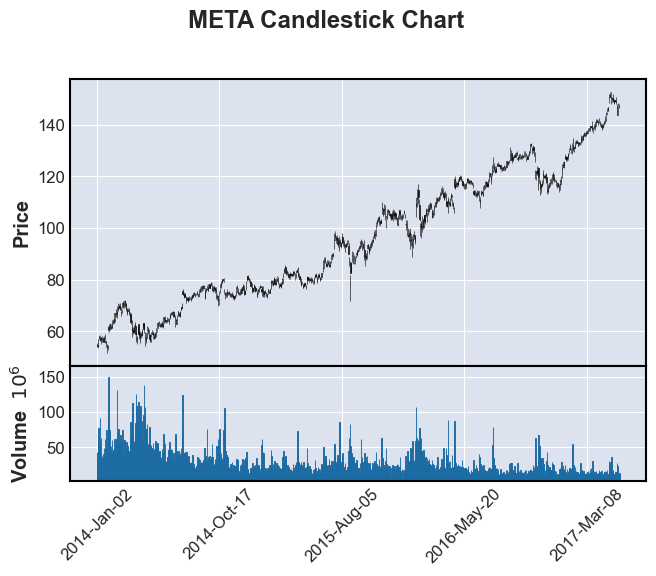

In [42]:
import mplfinance as mpf

# Plot candlestick chart with volume
mpf.plot(yahoo, type='candle', volume=True, title='META Candlestick Chart')


In [46]:
# Only drop 'Adj Close' if it exists
if 'Adj Close' in yahoo.columns:
    yahoo = yahoo.drop('Adj Close', axis=1)


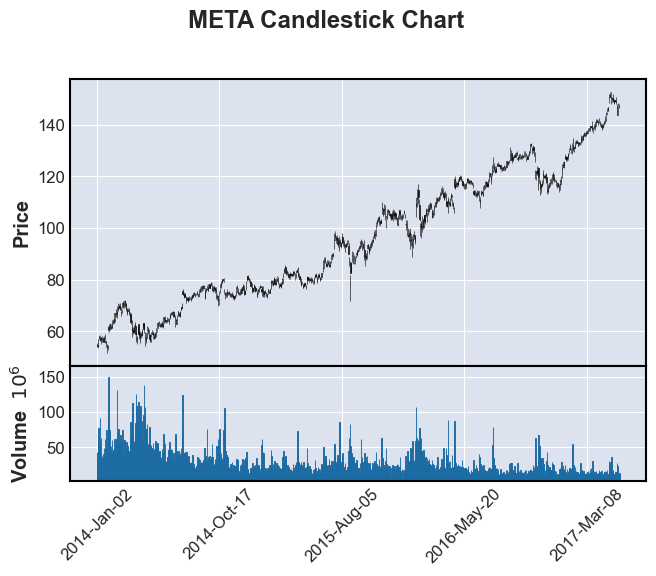

In [50]:
mpf.plot(yahoo, type='candle', volume=True, title='META Candlestick Chart')


### IEX

IEX is an alternative exchange started in response to the HFT controversy and portrayed in Michael Lewis' controversial Flash Boys. It aims to slow down the speed of trading to create a more level playing field and has been growing rapidly since launch in 2016 while still small with a market share of around 2.5% in June 2018.

> **Note:** IEX now requires an [API](https://iexcloud.io/) key after registration for (free) account that you can store as environment variable and retrieve as illustrated below, or pass directly via keyword argument to `pandas_datareader`.

In [55]:
IEX_API_KEY=os.getenv('IEX_API_KEY')

[*********************100%***********************]  1 of 1 completed


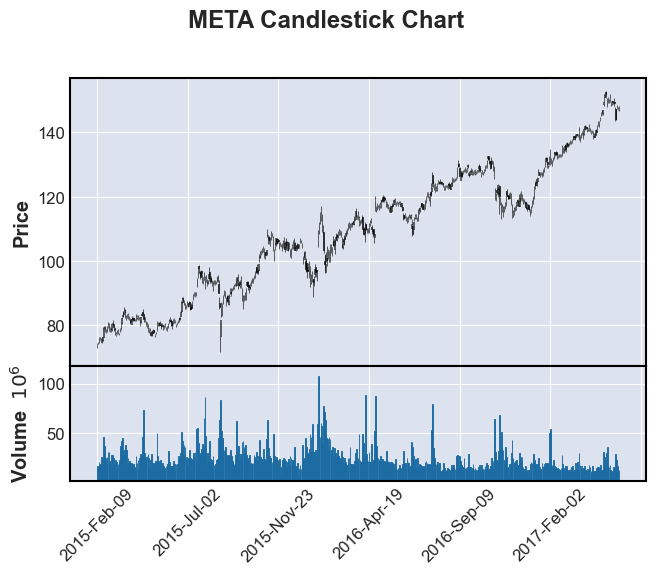

In [61]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Step 1: Download data for META (Facebook)
start = '2015-02-09'
end = '2017-05-24'
yahoo = yf.download('META', start=start, end=end)

# Step 2: Ensure column names are clean
if isinstance(yahoo.columns, pd.MultiIndex):
    yahoo.columns = yahoo.columns.get_level_values(0)

# Step 3: Set index name for mplfinance
yahoo.index.name = 'Date'

# Step 4: Plot candlestick chart with volume
mpf.plot(yahoo, type='candle', volume=True, title='META Candlestick Chart')


In [65]:
yahoo.tail()


Price,Close,High,Low,Open,Volume
Date,,,,,
2017-05-17,144.059662,147.858811,143.632000,147.192468,28300100
2017-05-18,146.854340,147.341656,143.721518,143.930378,23031600
2017-05-19,147.252182,148.574927,147.152737,147.640054,16187900
2017-05-22,147.431198,147.779279,146.884196,147.272067,12586700
2017-05-23,147.262131,147.998084,146.446597,147.709672,12817800


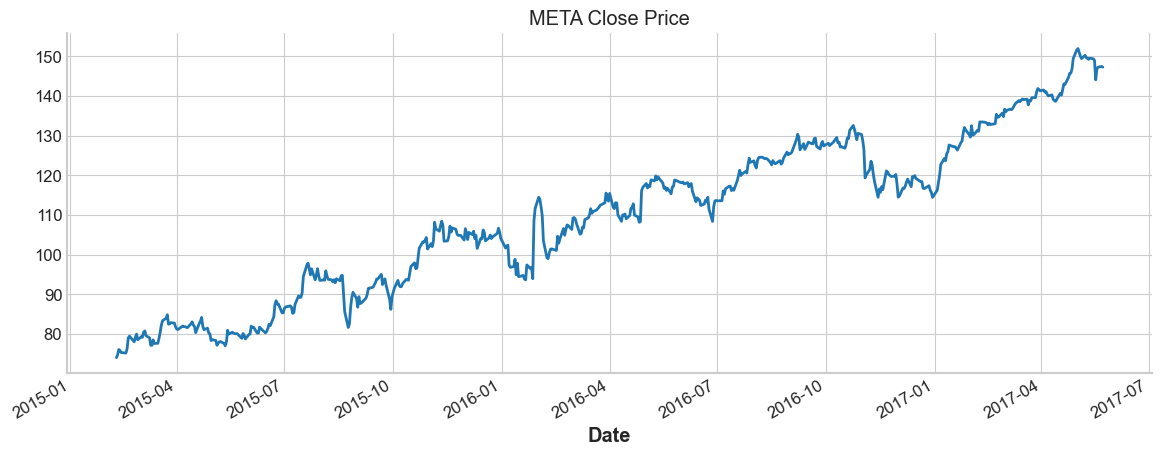

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Plot 'Close' prices from yahoo instead of iex
yahoo['Close'].plot(figsize=(14, 5), title='META Close Price')
sns.despine()
plt.show()


#### Book Data

In addition to historical EOD price and volume data, IEX provides real-time depth of book quotations that offer an aggregated size of orders by price and side. This service also includes last trade price and size information.

DEEP is used to receive real-time depth of book quotations direct from IEX. The depth of book quotations received via DEEP provide an aggregated size of resting displayed orders at a price and side, and do not indicate the size or number of individual orders at any price level. Non-displayed orders and non-displayed portions of reserve orders are not represented in DEEP.

DEEP also provides last trade price and size information. Trades resulting from either displayed or non-displayed orders matching on IEX will be reported. Routed executions will not be reported.

Only works on trading days.

In [74]:
book = web.get_iex_book('AAPL')

TypeError: Failed to interpret response as JSON.

In [ ]:
list(book.keys())

In [ ]:
orders = pd.concat([pd.DataFrame(book[side]).assign(side=side) for side in ['bids', 'asks']])
orders.head()

In [ ]:
for key in book.keys():
    try:
        print(f'\n{key}')
        print(pd.DataFrame(book[key]))
    except:
        print(book[key])

In [ ]:
pd.DataFrame(book['trades']).head()

### Quandl

Obtain Quandl [API Key](https://www.quandl.com/tools/api) and store in environment variable as `QUANDL_API_KEY`.

In [ ]:
symbol = 'FB.US'

quandl = web.DataReader(symbol, 'quandl', '2015-01-01')
quandl.info()

### FRED

In [ ]:
start = datetime(2010, 1, 1)

end = datetime(2013, 1, 27)

gdp = web.DataReader('GDP', 'fred', start, end)

gdp.info()

In [82]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2015-03-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  27 non-null     float64
 1   CPILFESL  27 non-null     float64
dtypes: float64(2)
memory usage: 648.0 bytes


### Fama/French

In [85]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [87]:
ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created using the 202505 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2025 Eugene F. Fama and Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)
  4 : Number of Firms in Portfolios (59 rows x 5 cols)
  5 : Average Firm Size (59 rows x 5 cols)
  6 : Sum of BE / Sum of ME (5 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (5 rows x 5 cols)


### World Bank

In [90]:
from pandas_datareader import wb
gdp_variables = wb.search('gdp.*capita.*const')
gdp_variables.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
11215,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,Gross domestic product is the total income ear...,"b'Country official statistics, National Statis...",Economy & Growth
11217,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,Gross domestic product is the total income ear...,"b'Country official statistics, National Statis...",Economy & Growth
11219,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",,World Development Indicators,This indicator provides values for gross domes...,"b'International Comparison Program (ICP), Worl...",Economy & Growth
11220,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [91]:
wb_data = wb.download(indicator='NY.GDP.PCAP.KD', 
                      country=['US', 'CA', 'MX'], 
                      start=1990, 
                      end=2019)
wb_data.head()

NY.GDP.PCAP.KD
country year                
Canada  2019    45100.291507
        2018    44907.343691
        2017    44339.388669
        2016    43551.342598
        2015    43594.194105

### OECD

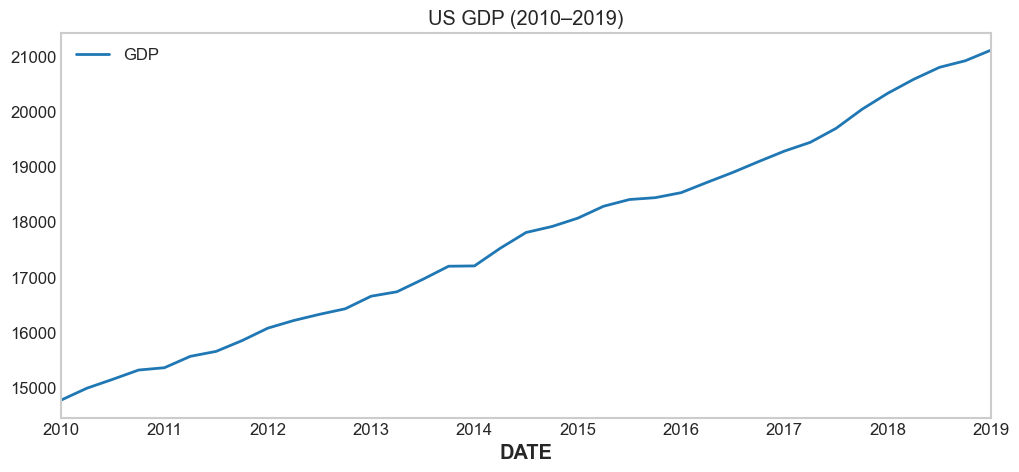

In [97]:
from pandas_datareader import data as web
import matplotlib.pyplot as plt

# Download GDP data from FRED
df = web.DataReader('GDP', 'fred', start='2010', end='2019')

# Plot
df.plot(title='US GDP (2010–2019)', figsize=(12, 5))
plt.grid()
plt.show()


### EuroStat

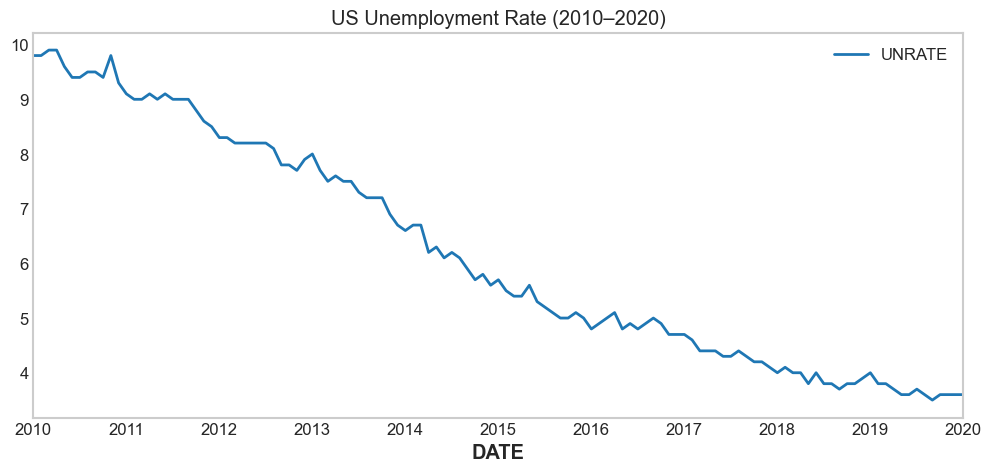

In [103]:
from pandas_datareader import data as web
import matplotlib.pyplot as plt

# US Unemployment Rate from FRED
df = web.DataReader('UNRATE', 'fred', start='2010', end='2020')
df.plot(title='US Unemployment Rate (2010–2020)', figsize=(12, 5))
plt.grid()
plt.show()


In [105]:
df.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6




### Stooq

Google finance stopped providing common index data download. The Stooq site had this data for download for a while but is currently broken, awaiting release of [fix](https://github.com/pydata/pandas-datareader/issues/594)

In [109]:
index_url = 'https://stooq.com/t/'
ix = pd.read_html(index_url)
len(ix)

47

In [110]:
sp500_stooq = web.DataReader('^SPX', 'stooq')
sp500_stooq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1253 entries, 2025-07-15 to 2020-07-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1253 non-null   float64
 1   High    1253 non-null   float64
 2   Low     1253 non-null   float64
 3   Close   1253 non-null   float64
 4   Volume  1253 non-null   float64
dtypes: float64(5)
memory usage: 58.7 KB


In [113]:
sp500_stooq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-15,6295.29,6302.04,6241.68,6243.76,3.103007e+09
2025-07-14,6255.15,6273.31,6239.22,6268.56,2.705074e+09
2025-07-11,6255.68,6269.44,6237.60,6259.75,2.631005e+09
2025-07-10,6266.80,6290.22,6251.44,6280.46,2.818583e+09
2025-07-09,6243.33,6269.16,6231.43,6263.26,2.808149e+09


In [115]:
sp500_stooq.Close.plot(figsize=(14,4))
sns.despine()
plt.tight_layout()

### NASDAQ Symbols

In [ ]:
import pandas as pd

url = "https://ftp.nasdaqtrader.com/dynamic/SymDir/nasdaqtraded.txt"

# Use correct separator and skip the last footer row
df = pd.read_csv(url, sep="|")
df = df[df['Test Issue'] == 'N']  # Remove test listings
df = df[df['ETF'] == 'N']         # Optionally remove ETFs
df = df[df['NASDAQ Symbol'].notna()]
df = df.reset_index(drop=True)

# Show info
df.info()


### Tiingo

Requires [signing up](https://api.tiingo.com/) and storing API key in environment

In [ ]:
df = web.get_data_tiingo('GOOG', api_key=os.getenv('TIINGO_API_KEY'))

In [ ]:
df.info()